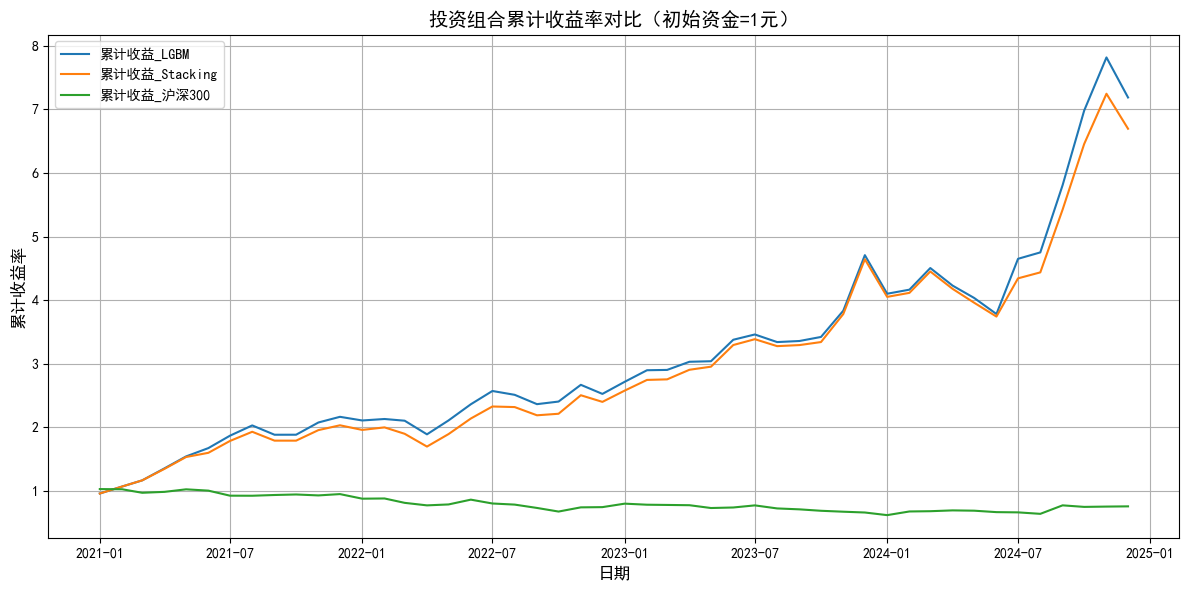

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['axes.unicode_minus'] = False

df = pd.read_csv(r"C:\Users\32197\Desktop\结果.csv")

df['year_month'] = pd.to_datetime(df['year_month'])
df = df.sort_values('year_month').reset_index(drop=True)

initial_value = 1
cumulative_data = {
    'Date': df['year_month']
}
for column in df.columns[1:]:
    cumulative_data[column.replace('月收益率', '累计收益')] = (1 + df[column]).cumprod() * initial_value

cumulative_returns = pd.DataFrame(cumulative_data)
cumulative_returns.index = pd.to_datetime(cumulative_returns['Date'])

plt.figure(figsize=(12, 6))
for column in cumulative_returns.columns:
    if column != 'Date':
        plt.plot(cumulative_returns.index, cumulative_returns[column], label=column)

plt.title("投资组合累计收益率对比（初始资金=1元）", fontsize=14)
plt.xlabel("日期", fontsize=12)
plt.ylabel("累计收益率", fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.savefig(r"C:\Users\32197\Desktop\累积收益率对比.png", dpi=400)
plt.show()


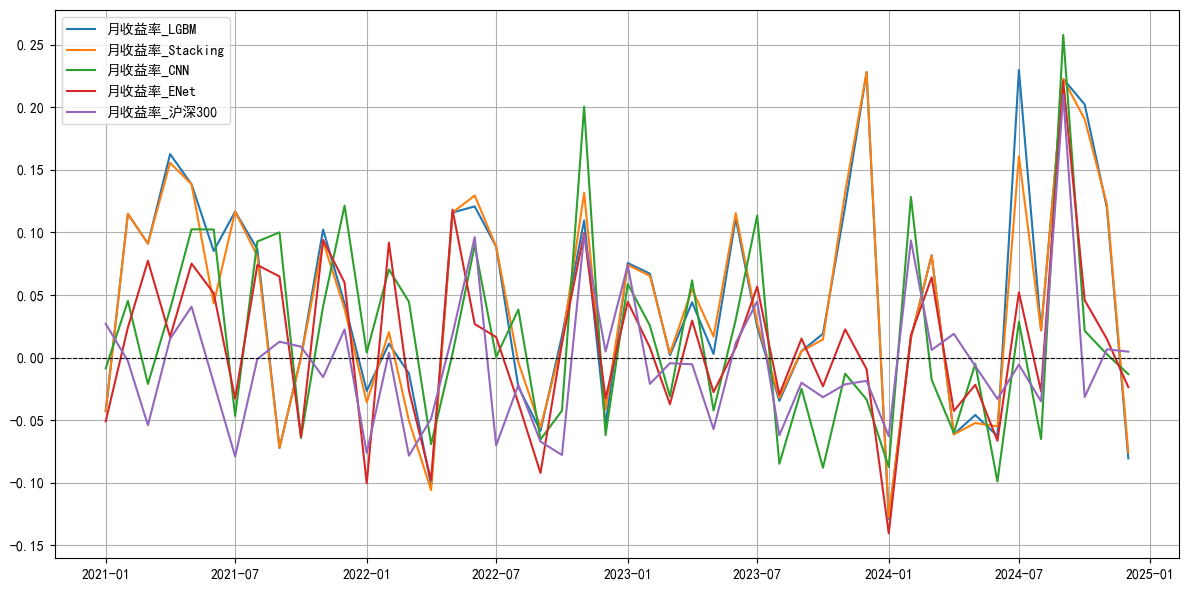

In [ ]:
df['year_month'] = pd.to_datetime(df['year_month'])
df = df.sort_values('year_month')


df.set_index('year_month', inplace=True)

plt.figure(figsize=(12, 6))
for column in df.columns:
    plt.plot(df.index, df[column], label=column)


plt.axhline(0, color='black', linewidth=0.8, linestyle='--')  # 零收益参考线
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig(r"C:\Users\32197\Desktop\月收益率对比.png", dpi = 400)
plt.show()


In [18]:
df.head(1)

,月收益率_LGBM,月收益率_Stacking,月收益率_CNN,月收益率_ENet,月收益率_沪深300
year_month,,,,,
2021-01-01,-0.04281,-0.04281,-0.008655,-0.050895,0.026994


In [19]:
df = pd.read_csv(r"C:\Users\32197\Desktop\结果+ff5.csv")

In [20]:
df.head(1)

,year_month,月收益率_LGBM,月收益率_Stacking,月收益率_CNN,月收益率_ENet,月收益率_沪深300,mkt_rf,smb,hml,rmw,cma,rf
0,2021/1/1,-0.04281,-0.04281,-0.008655,-0.050895,0.026994,-0.001189,-0.093146,-0.038033,0.094741,-0.074237,0.001241


In [22]:
import numpy as np 
# 1. 计算超额收益
df['excess_return'] = df['月收益率_沪深300'] - df['rf']

# 2. 计算平均超额收益和标准差
mean_excess = df['excess_return'].mean()
std_excess = df['excess_return'].std()

# 3. 计算年化 Sharpe Ratio
sharpe_ratio = (mean_excess / std_excess) * np.sqrt(12)

print("沪深300指数的年化 Sharpe 比率为：", sharpe_ratio)

沪深300指数的年化 Sharpe 比率为： -0.36164811722389795


In [26]:
import numpy as np 
# 1. 计算超额收益
df['excess_return_1'] = df['月收益率_LGBM'] - df['rf']
df['excess_return_2'] = df['月收益率_Stacking'] - df['rf']
df['excess_return_3'] = df['月收益率_CNN'] - df['rf']
df['excess_return_4'] = df['月收益率_ENet'] - df['rf']

# 2. 计算平均超额收益和标准差
mean_excess1 = df['excess_return_1'].mean()
std_excess1 = df['excess_return_1'].std()
mean_excess2 = df['excess_return_2'].mean()
std_excess2 = df['excess_return_2'].std()
mean_excess3 = df['excess_return_3'].mean()
std_excess3 = df['excess_return_3'].std()
mean_excess4 = df['excess_return_4'].mean()
std_excess4 = df['excess_return_4'].std()

# 3. 计算年化 Sharpe Ratio
sharpe_ratio1 = (mean_excess1 / std_excess1) * np.sqrt(12)
sharpe_ratio2 = (mean_excess2 / std_excess2) * np.sqrt(12)
sharpe_ratio3 = (mean_excess3 / std_excess3) * np.sqrt(12)
sharpe_ratio4 = (mean_excess4 / std_excess4) * np.sqrt(12)

print("LGBM的年化 Sharpe 比率为：", sharpe_ratio1)
print("STacking的年化 Sharpe 比率为：", sharpe_ratio2)
print("CNN的年化 Sharpe 比率为：", sharpe_ratio3)
print("Enet的年化 Sharpe 比率为：", sharpe_ratio4)

LGBM的年化 Sharpe 比率为： 1.7271127855348443
STacking的年化 Sharpe 比率为： 1.7102579462706973
CNN的年化 Sharpe 比率为： 0.6742665113246037
Enet的年化 Sharpe 比率为： 0.5062983467601767


In [27]:
import statsmodels.api as sm

# 假设 df 包含这些列：return, rf, mkt_rf, SMB, HML, RMW, CMA
# 1. 构造因变量：超额收益

# 2. 构造自变量矩阵（不要忘记加常数项）
X = df[['mkt_rf', 'smb', 'hml', 'rmw', 'cma']]
X = sm.add_constant(X)

# 3. 拟合回归模型
model = sm.OLS(df['excess_return_1'], X).fit()

# 4. 输出回归结果
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        excess_return_1   R-squared:                       0.618
Model:                            OLS   Adj. R-squared:                  0.572
Method:                 Least Squares   F-statistic:                     13.57
Date:                Sun, 08 Jun 2025   Prob (F-statistic):           6.82e-08
Time:                        20:29:02   Log-Likelihood:                 71.580
No. Observations:                  48   AIC:                            -131.2
Df Residuals:                      42   BIC:                            -119.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0382      0.009      4.311      0.0

In [28]:
import statsmodels.api as sm

# 假设 df 包含这些列：return, rf, mkt_rf, SMB, HML, RMW, CMA
# 1. 构造因变量：超额收益

# 2. 构造自变量矩阵（不要忘记加常数项）
X = df[['mkt_rf', 'smb', 'hml', 'rmw', 'cma']]
X = sm.add_constant(X)

# 3. 拟合回归模型
model = sm.OLS(df['excess_return_2'], X).fit()

# 4. 输出回归结果
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        excess_return_2   R-squared:                       0.632
Model:                            OLS   Adj. R-squared:                  0.588
Method:                 Least Squares   F-statistic:                     14.42
Date:                Sun, 08 Jun 2025   Prob (F-statistic):           3.18e-08
Time:                        20:29:13   Log-Likelihood:                 73.927
No. Observations:                  48   AIC:                            -135.9
Df Residuals:                      42   BIC:                            -124.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0366      0.008      4.336      0.0

In [29]:
import statsmodels.api as sm

# 假设 df 包含这些列：return, rf, mkt_rf, SMB, HML, RMW, CMA
# 1. 构造因变量：超额收益

# 2. 构造自变量矩阵（不要忘记加常数项）
X = df[['mkt_rf', 'smb', 'hml', 'rmw', 'cma']]
X = sm.add_constant(X)

# 3. 拟合回归模型
model = sm.OLS(df['excess_return_3'], X).fit()

# 4. 输出回归结果
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        excess_return_3   R-squared:                       0.698
Model:                            OLS   Adj. R-squared:                  0.662
Method:                 Least Squares   F-statistic:                     19.40
Date:                Sun, 08 Jun 2025   Prob (F-statistic):           5.77e-10
Time:                        20:29:27   Log-Likelihood:                 84.381
No. Observations:                  48   AIC:                            -156.8
Df Residuals:                      42   BIC:                            -145.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0088      0.007      1.298      0.2

In [30]:
import statsmodels.api as sm

# 假设 df 包含这些列：return, rf, mkt_rf, SMB, HML, RMW, CMA
# 1. 构造因变量：超额收益

# 2. 构造自变量矩阵（不要忘记加常数项）
X = df[['mkt_rf', 'smb', 'hml', 'rmw', 'cma']]
X = sm.add_constant(X)

# 3. 拟合回归模型
model = sm.OLS(df['excess_return_4'], X).fit()

# 4. 输出回归结果
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        excess_return_4   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     74.54
Date:                Sun, 08 Jun 2025   Prob (F-statistic):           8.85e-20
Time:                        20:29:35   Log-Likelihood:                 118.34
No. Observations:                  48   AIC:                            -224.7
Df Residuals:                      42   BIC:                            -213.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0009      0.003      0.271      0.7

In [31]:
import statsmodels.api as sm

# 假设 df 包含这些列：return, rf, mkt_rf, SMB, HML, RMW, CMA
# 1. 构造因变量：超额收益

# 2. 构造自变量矩阵（不要忘记加常数项）
X = df[['mkt_rf', 'smb', 'hml', 'rmw', 'cma']]
X = sm.add_constant(X)

# 3. 拟合回归模型
model = sm.OLS(df['excess_return'], X).fit()

# 4. 输出回归结果
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          excess_return   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     108.2
Date:                Sun, 08 Jun 2025   Prob (F-statistic):           7.26e-23
Time:                        20:29:47   Log-Likelihood:                 135.15
No. Observations:                  48   AIC:                            -258.3
Df Residuals:                      42   BIC:                            -247.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0026      0.002     -1.099      0.2